In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

# Connettoma
## Hagmann - 998 ROIs
Sono presenti i seguenti file:
- matrix è il connettoma vero e proprio
- names abbrev dà nomi abbreviati delle regioni
- names full dà i nomi completi
- xyz_centers dà le info sulla posizione dei centri

In [2]:
%ls ../Data/Hagmann/*_file* 

../Data/Hagmann/group_mean_connectivity_matrix_file.txt*
../Data/Hagmann/group_mean_region_names_abbrev_file.txt*
../Data/Hagmann/group_mean_region_names_full_file.txt*
../Data/Hagmann/group_mean_region_xyz_centers_file.txt*
../Data/Hagmann/subjA_connectivity_matrix_file.txt*
../Data/Hagmann/subjA_region_names_abbrev_file.txt*
../Data/Hagmann/subjA_region_names_full_file.txt*
../Data/Hagmann/subjA_region_xyz_centers_file.txt*
../Data/Hagmann/subjB_connectivity_matrix_file.txt*
../Data/Hagmann/subjB_region_names_abbrev_file.txt*
../Data/Hagmann/subjB_region_names_full_file.txt*
../Data/Hagmann/subjB_region_xyz_centers_file.txt*
../Data/Hagmann/subjC_connectivity_matrix_file.txt*
../Data/Hagmann/subjC_region_names_abbrev_file.txt*
../Data/Hagmann/subjC_region_names_full_file.txt*
../Data/Hagmann/subjC_region_xyz_centers_file.txt*
../Data/Hagmann/subjD_connectivity_matrix_file.txt*
../Data/Hagmann/subjD_region_names_abbrev_file.txt*
../Data/Hagmann/subjD_region_names_full_file.txt*
../Dat

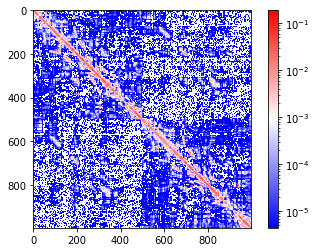

(998, 998)

In [3]:
W=np.loadtxt("../Data/Hagmann/group_mean_connectivity_matrix_file.txt")
plt.imshow(W,norm=colors.LogNorm(),cmap='bwr')
plt.colorbar()
plt.show()
W.shape

### Scatterig 3D 998

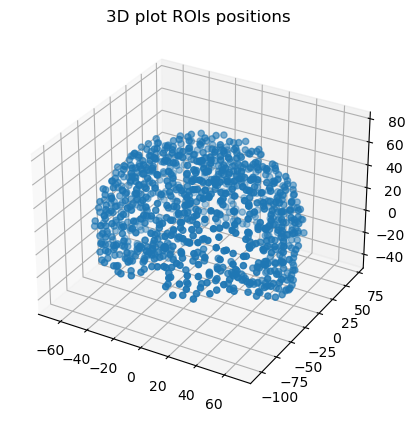

In [4]:
centers=np.loadtxt("../Data/Hagmann/group_mean_region_xyz_centers_file.txt")
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(projection='3d')
centers=centers.transpose()
ax.scatter(centers[0],centers[1],centers[2], marker='o')
ax.set_title("3D plot ROIs positions")
plt.show()

### Analisi connettoma 998

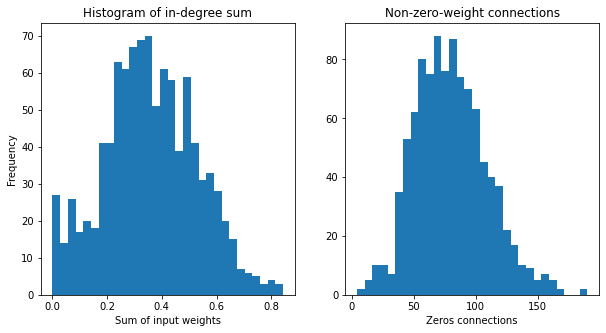

In [5]:
fig, ax =plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(W.sum(axis=0),30)
ax[0].set_title("Histogram of in-degree sum")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Sum of input weights")

ax[1].hist(np.count_nonzero(W, axis=0),30)
ax[1].set_title("Non-zero-weight connections")
ax[1].set_xlabel("Zeros connections")
plt.show()

## Ponce - 66 ROIs
### Connettoma

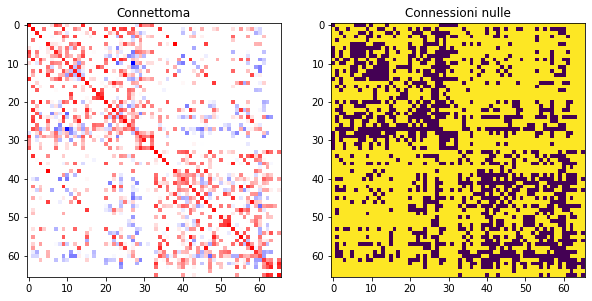

(66, 66)

In [6]:
W2=np.loadtxt("../Data/connectivity_matrix/weights.txt")

fig,ax =plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(W2,norm=colors.LogNorm(), cmap='bwr')
ax[0].set_title("Connettoma")
ax[1].imshow(W2==0)
ax[1].set_title("Connessioni nulle")
plt.show()
W2.shape

### Scattering 3D

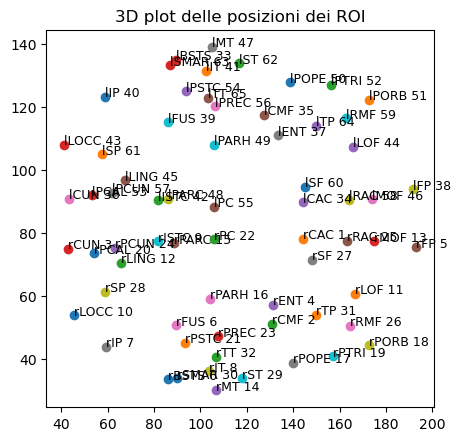

In [7]:
centers=np.genfromtxt("../Data/connectivity_matrix/centres.txt",dtype=None, usecols=(1,2,3))
labels=np.genfromtxt("../Data/connectivity_matrix/centres.txt",dtype=str, usecols=(0))

fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot()#projection='3d')
centers=centers.transpose()
for i,label in enumerate(labels):
    ax.scatter(centers[0,i],centers[1,i], marker='o')
    #print(label)
    ax.text(centers[0,i],centers[1,i], label+" "+str(i), size=9)



ax.set_title("3D plot delle posizioni dei ROI")
plt.show()
#labels

### Analisi connettoma 66

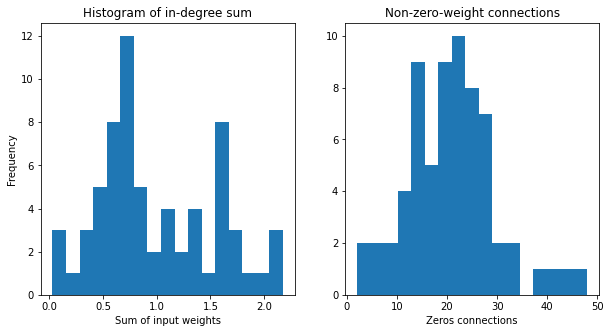

In [8]:
fig, ax =plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(W2.sum(axis=0),17)
ax[0].set_title("Histogram of in-degree sum")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Sum of input weights")

ax[1].hist(np.count_nonzero(W2, axis=0),17)
ax[1].set_title("Non-zero-weight connections")
ax[1].set_xlabel("Zeros connections")
plt.show()

# fMRI Ponce

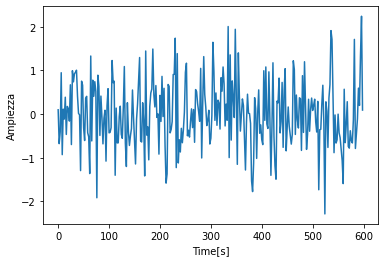

In [10]:
signal=np.loadtxt("../Data/fMRI/subj1_block1.txt")
labels_ponce=np.loadtxt('../Data/fMRI/ROIs_Labels.txt',dtype=str)
t=np.arange(300)/0.5
plt.plot(t,signal[:,0])
plt.xlabel('Time[s]')
plt.ylabel('Ampiezza')
#plt.xlim(0,40)
plt.show()

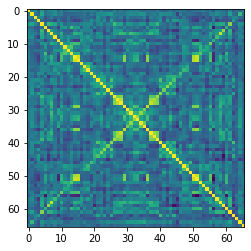

In [18]:
fig,ax=plt.subplots(1,1)
ax.imshow(np.corrcoef(signal, rowvar=False))

[11, 22, 16, 28, 0, 3, 4, 9, 8, 30, 6, 21, 26, 25, 12, 29, 1, 17, 20, 18, 27, 14, 32, 15, 31, 23, 19, 24, 7, 13, 10, 2, 5, 54, 43, 49, 37, 65, 62, 61, 56, 57, 35, 59, 44, 39, 40, 53, 36, 64, 48, 45, 47, 38, 51, 33, 50, 34, 42, 46, 41, 58, 52, 55, 63, 60]
[4, 16, 31, 5, 6, 32, 10, 28, 8, 7, 30, 0, 14, 29, 21, 23, 2, 17, 19, 26, 18, 11, 1, 25, 27, 13, 12, 20, 3, 15, 9, 24, 22, 55, 57, 42, 48, 36, 53, 45, 46, 60, 58, 34, 44, 51, 59, 52, 50, 35, 56, 54, 62, 47, 33, 63, 40, 41, 61, 43, 65, 39, 38, 64, 49, 37]
0
1


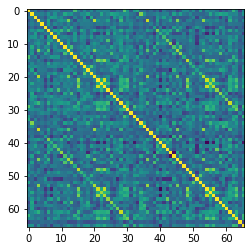

In [29]:
labels_hagmann=np.loadtxt("../Data/connectivity_matrix/centres.txt", dtype=str, usecols=0)
dic_hagmann={v:i for i,v in enumerate(labels_hagmann)}
dic_ponce={v:i for i,v in enumerate(labels_ponce)}

new_order_ponce=[dic_ponce[i] for i in labels_hagmann]
#new_order_hagmann=[dic_hagmann[i] for i in labels_ponce]


signal_new=np.zeros(signal.shape)
for i in range(66):
    signal_new[:,i]=signal[:,new_order_ponce[i]]


plt.imshow(np.corrcoef(signal_new, rowvar=False))


print(new_order_ponce)
print(new_order_hagmann)
signal[:,dic_ponce['rBSTS']]==signal_new[:,0]

for i in range(2):
    print(i)